<a href="https://colab.research.google.com/github/koko23monster/US-accidents-eda-dec20/blob/main/us_accidents_eda_dec20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-eda-dec20')
jovian.set_colab_id('1h_3BxHIMabXoVWSvvd5LZgUCjbhdIPIx')

     |████████████████████████████████| 68 kB 4.3 MB/s 


# us-accidents-eda-dec20

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

## download data

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: komalingle
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:01<00:00, 74.5MB/s]


In [ ]:
data_file = './us-accidents/US_Accidents_Dec20_updated.csv' 

## data preparation and cleaning 
1. Load the file using Pandas
2. Explore the information about the data and columns
3. Fix any missing or incorrect values

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_file)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
numerics = ['int16','int32','int64','float16','float32','float64']
num_df = df.select_dtypes(include=numerics)

In [ ]:
num_df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.10891,-83.09286,40.11206,-83.03187,3.230,NaN,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.86542,-84.06280,39.86501,-84.04873,0.747,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.10266,-84.52468,39.10209,-84.52396,0.055,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,39.10148,-84.52341,39.09841,-84.52241,0.219,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
4,2,41.06213,-81.53784,41.06217,-81.53547,0.123,NaN,39.0,NaN,55.0,29.65,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,2,34.00248,-117.37936,33.99888,-117.37094,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
1516060,2,32.76696,-117.14806,32.76555,-117.15363,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
1516061,2,33.77545,-117.84779,33.77740,-117.85727,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
1516062,2,33.99246,-118.40302,33.98311,-118.39565,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


In [ ]:
Non_Null_num_df = num_df.dropna()
Non_Null_num_df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
44,4,40.451120,-85.150480,40.354290,-85.149930,6.690,9001.0,19.9,7.3,81.0,29.85,2.0,12.7,0.00
45,4,40.354290,-85.149930,40.451120,-85.150480,6.690,473.0,19.9,7.3,81.0,29.85,2.0,12.7,0.00
49,4,40.728130,-84.789650,40.745590,-84.789620,1.206,12998.0,17.1,0.6,77.0,29.91,2.5,19.6,0.01
52,2,41.831930,-80.101430,41.841490,-80.110990,0.824,25529.0,21.0,9.9,85.0,29.69,1.0,10.4,0.00
69,2,41.483390,-81.662970,41.476920,-81.660750,0.462,3937.0,24.1,7.1,75.0,29.82,2.0,28.8,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516020,3,37.609816,-122.493720,37.608821,-122.495261,0.109,895.0,78.0,78.0,54.0,29.77,10.0,7.0,0.00
1516024,4,38.995930,-121.672020,39.003170,-121.662679,0.708,3044.0,98.0,98.0,23.0,29.62,10.0,8.0,0.00
1516025,4,39.003170,-121.662679,38.995930,-121.672020,0.708,2500.0,98.0,98.0,23.0,29.62,10.0,8.0,0.00
1516026,3,34.121320,-117.254540,34.121320,-117.254540,0.000,1498.0,67.0,67.0,73.0,28.61,10.0,3.0,0.00


 1. total number of rows (335552).
 2. exceeds max_rows (20000). 
 3. Limiting to first (20000) rows.

##Exploratory Analysis and Visualization

In [ ]:
Cities = df.City.value_counts()
Cities

Los Angeles        39984
Miami              36233
Charlotte          22203
Houston            20843
Dallas             19497
                   ...  
Crossett               1
Berlin township        1
East Quogue            1
Calvin                 1
Lewis                  1
Name: City, Length: 10657, dtype: int64

In [ ]:

len(Cities[Cities > 1000])

251

In [ ]:
severe_accident_city = df.City[df.Severity > 2].value_counts()
severe_accident_city

Chicago            7654
Houston            6774
Dallas             6189
Atlanta            4437
Denver             4241
                   ... 
Dammeron Valley       1
Rougemont             1
Indian River          1
Warden                1
Long Prairie          1
Name: City, Length: 8724, dtype: int64

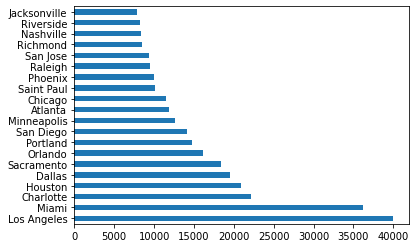

In [ ]:
Cities[:20].plot(kind='barh')

In [ ]:
len(severe_accident_city[severe_accident_city > 1000])

28

In [ ]:
df[df.City == 'Los Angeles'][df.Severity == 4][:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5483,A-2722083,4,2016-03-24 02:20:06,2016-03-24 08:20:06,33.930760,-118.431755,33.930760,-118.431746,0.001,Closed at Pershing Dr - Road closed due to acc...,7641.0,W Imperial Hwy,L,Los Angeles,Los Angeles,CA,90045,US,US/Pacific,KLAX,2016-03-24 01:53:00,60.1,NaN,51.0,30.12,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
5485,A-2722085,4,2016-03-24 02:35:35,2016-03-24 08:35:35,33.930956,-118.429607,33.930884,-118.434545,0.283,Closed at Vista Del Mar - Road closed due to a...,7605.0,W Imperial Hwy,L,Los Angeles,Los Angeles,CA,90045,US,US/Pacific,KLAX,2016-03-24 02:53:00,57.9,NaN,53.0,30.10,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
5493,A-2722093,4,2016-03-24 05:36:05,2016-03-24 11:36:05,33.939551,-118.433803,33.930820,-118.429280,0.657,Closed at Imperial Hwy - Road closed due to ac...,NaN,Pershing Dr,R,Los Angeles,Los Angeles,CA,90045,US,US/Pacific,KLAX,2016-03-24 05:53:00,53.1,NaN,59.0,30.08,10.0,ESE,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
5717,A-2722317,4,2016-03-28 19:14:49,2016-03-29 01:14:49,34.011632,-118.308920,34.009944,-118.308930,0.117,Closed between Browning Blvd and 41st St - Roa...,3989.0,S Western Ave,L,Los Angeles,Los Angeles,CA,90062-1166,US,US/Pacific,KCQT,2016-03-28 18:47:00,57.0,NaN,57.0,29.81,10.0,Variable,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
5718,A-2722318,4,2016-03-28 19:14:49,2016-03-29 01:14:49,34.009944,-118.308930,34.011632,-118.308920,0.117,Closed between 41st St and Browning Blvd - Roa...,4101.0,S Western Ave,L,Los Angeles,Los Angeles,CA,90062-1637,US,US/Pacific,KCQT,2016-03-28 18:47:00,57.0,NaN,57.0,29.81,10.0,Variable,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day


In [ ]:
df[df.City == 'Los Angeles'][df.Severity == 2][:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5360,A-2721960,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.09256,-118.206220,34.092560,-118.206220,0.000,At Avenue 43 - Accident.,NaN,CA-110 N,R,Los Angeles,Los Angeles,CA,90031,US,US/Pacific,KCQT,2016-03-22 19:47:00,64.0,NaN,24.0,30.00,10.0,NNW,9.2,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Night,Night,Day,Day
5364,A-2721964,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.94819,-118.279730,33.946760,-118.279750,0.099,At Century Blvd - Accident.,NaN,I-110 S,R,Los Angeles,Los Angeles,CA,90003,US,US/Pacific,KHHR,2016-03-22 20:53:00,64.0,NaN,23.0,30.02,10.0,NNW,11.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
5397,A-2721997,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.14470,-118.278650,34.141040,-118.277840,0.257,At Colorado St - Accident.,NaN,Golden State Fwy S,R,Los Angeles,Los Angeles,CA,90027,US,US/Pacific,KCQT,2016-03-23 11:47:00,73.9,NaN,14.0,30.15,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
5399,A-2721999,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.09914,-118.251853,34.099817,-118.251396,0.054,At I-5/Golden State Fwy - Accident. Left lane ...,NaN,CA-2 S,R,Los Angeles,Los Angeles,CA,90039,US,US/Pacific,KCQT,2016-03-23 11:47:00,73.9,NaN,14.0,30.15,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
5403,A-2722003,2,2016-03-23 13:07:50,2016-03-23 19:07:50,33.98407,-118.280700,33.980680,-118.280980,0.235,At Gage Ave - Accident.,NaN,I-110 S,R,Los Angeles,Los Angeles,CA,90003,US,US/Pacific,KHHR,2016-03-23 12:53:00,75.0,NaN,13.0,30.16,10.0,West,10.4,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df[df.City == 'New York'][df.Severity == 4][:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
33694,A-2750294,4,2016-12-04 05:00:26,2016-12-04 11:00:26,40.762057,-74.001332,40.760850,-74.002280,0.097,Closed at 40th St - Road closed due to accident.,NaN,W 42nd St,R,New York,New York,NY,10019,US,US/Eastern,KNYC,2016-12-04 04:51:00,41.0,35.2,47.0,30.19,10.0,NW,9.2,NaN,Overcast,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night
33695,A-2750295,4,2016-12-04 05:00:26,2016-12-04 11:00:26,40.760720,-74.002070,40.761340,-74.001620,0.049,Closed at 41st St - Road closed due to accident.,462.0,12th Ave,L,New York,New York,NY,10018-1026,US,US/Eastern,KNYC,2016-12-04 04:51:00,41.0,35.2,47.0,30.19,10.0,NW,9.2,NaN,Overcast,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night
35299,A-2751899,4,2016-12-08 11:14:47,2016-12-08 17:14:47,40.757391,-73.982249,40.758968,-73.981092,0.125,Closed at 48th St - Road closed due to accident.,1181.0,Avenue of the Americas,L,New York,New York,NY,10036-2710,US,US/Eastern,KNYC,2016-12-08 10:51:00,44.6,NaN,43.0,NaN,NaN,North,NaN,NaN,NaN,True,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
35942,A-2752542,4,2016-12-09 22:30:04,2016-12-10 04:30:04,40.757760,-73.996850,40.758210,-73.997910,0.064,Closed at RT-9A/12th Ave/Joe Dimaggio Hwy - Ro...,495.0,W 39th St,R,New York,New York,NY,10018-1216,US,US/Eastern,KNYC,2016-12-09 22:51:00,30.9,24.3,43.0,30.28,10.0,West,6.9,NaN,Clear,False,False,True,False,True,False,False,False,False,False,False,True,False,Night,Night,Night,Night
37826,A-2754426,4,2016-12-15 07:43:46,2016-12-15 13:43:46,40.769910,-73.994550,40.770730,-73.994420,0.057,Closed at 56th St - Road closed due to accident.,NaN,Joe DiMaggio Hwy,R,New York,New York,NY,10019,US,US/Eastern,KNYC,2016-12-15 07:51:00,25.0,14.2,37.0,29.84,10.0,WNW,11.5,NaN,Scattered Clouds,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df[df.City == 'New York'].mean()

Severity               2.376066
Start_Lat             40.793925
Start_Lng            -73.954537
End_Lat               40.794132
End_Lng              -73.955418
Distance(mi)           0.431145
Number               658.258242
Temperature(F)        57.258491
Wind_Chill(F)         50.767203
Humidity(%)           61.179729
Pressure(in)          29.987041
Visibility(mi)         9.002494
Wind_Speed(mph)        5.975015
Precipitation(in)      0.125008
Amenity                0.106635
Bump                   0.000948
Crossing               0.132227
Give_Way               0.000000
Junction               0.280332
No_Exit                0.017062
Railway                0.020379
Roundabout             0.000000
Station                0.039336
Stop                   0.018957
Traffic_Calming        0.000948
Traffic_Signal         0.179384
Turning_Loop           0.000000
dtype: float64

In [ ]:
df[df.City == 'Los Angeles'].mean()

Severity                2.085659
Start_Lat              34.032296
Start_Lng            -118.274565
End_Lat                34.032333
End_Lng              -118.274321
Distance(mi)            0.257308
Number               3911.747838
Temperature(F)         65.691660
Wind_Chill(F)          64.859357
Humidity(%)            58.380286
Pressure(in)           29.850749
Visibility(mi)          9.022990
Wind_Speed(mph)         3.769816
Precipitation(in)       0.004444
Amenity                 0.010254
Bump                    0.000050
Crossing                0.031363
Give_Way                0.000000
Junction                0.171369
No_Exit                 0.001851
Railway                 0.021108
Roundabout              0.000000
Station                 0.038615
Stop                    0.011129
Traffic_Calming         0.000050
Traffic_Signal          0.123499
Turning_Loop            0.000000
dtype: float64

In [ ]:
df[df.City == 'Vale'].mean()

Severity                2.073643
Start_Lat              43.695879
Start_Lng            -115.524856
End_Lat                43.689333
End_Lng              -115.518981
Distance(mi)            1.072395
Number               2544.849673
Temperature(F)         47.119141
Wind_Chill(F)          44.200000
Humidity(%)            62.164062
Pressure(in)           28.465155
Visibility(mi)          8.623837
Wind_Speed(mph)         4.911966
Precipitation(in)       0.001869
Amenity                 0.000000
Bump                    0.000000
Crossing                0.077519
Give_Way                0.000000
Junction                0.015504
No_Exit                 0.000000
Railway                 0.019380
Roundabout              0.000000
Station                 0.000000
Stop                    0.000000
Traffic_Calming         0.000000
Traffic_Signal          0.000000
Turning_Loop            0.000000
dtype: float64

In [ ]:
Cities[:1000]

Los Angeles       39984
Miami             36233
Charlotte         22203
Houston           20843
Dallas            19497
                  ...  
Brookfield          259
Commerce            259
Mc Farland          259
Vale                258
Lithia Springs      258
Name: City, Length: 1000, dtype: int64

In [ ]:
df[df.City == 'Los Angeles'].mean()

Severity                2.085659
Start_Lat              34.032296
Start_Lng            -118.274565
End_Lat                34.032333
End_Lng              -118.274321
Distance(mi)            0.257308
Number               3911.747838
Temperature(F)         65.691660
Wind_Chill(F)          64.859357
Humidity(%)            58.380286
Pressure(in)           29.850749
Visibility(mi)          9.022990
Wind_Speed(mph)         3.769816
Precipitation(in)       0.004444
Amenity                 0.010254
Bump                    0.000050
Crossing                0.031363
Give_Way                0.000000
Junction                0.171369
No_Exit                 0.001851
Railway                 0.021108
Roundabout              0.000000
Station                 0.038615
Stop                    0.011129
Traffic_Calming         0.000050
Traffic_Signal          0.123499
Turning_Loop            0.000000
dtype: float64

In [ ]:
Cities[Cities > 1000]

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Elgin           1007
Chandler        1006
Palo Alto       1006
Flushing        1001
Sandy           1001
Name: City, Length: 251, dtype: int64

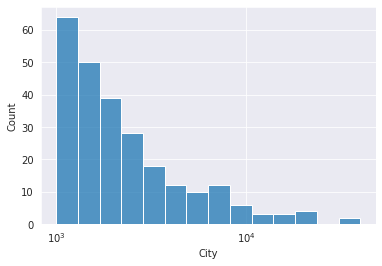

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
sns.histplot(Cities[Cities>1000],log_scale = True)

In [ ]:
Cities[Cities < 10]

Raeford            9
Overgaard          9
Newport Coast      9
Palm Desert        9
Waite Park         9
                  ..
Crossett           1
Berlin township    1
East Quogue        1
Calvin             1
Lewis              1
Name: City, Length: 4704, dtype: int64

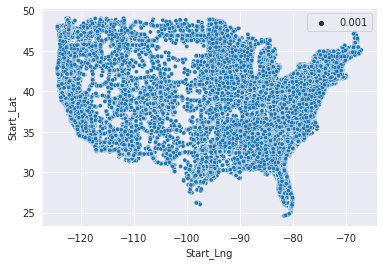

In [ ]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=0.001)

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat,lon

(40.108909999999995, -83.09286)

In [ ]:
map = folium.Map(location=[38.9, -77.05],zoom_start=12)

sample_df = df.sample(int(0.001 * len(df)))
heat_data = zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng))
HeatMap(heat_data).add_to(map)

In [ ]:
map

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

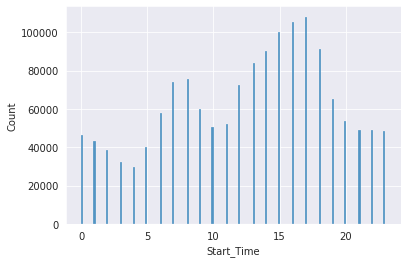

In [ ]:
Start= pd.to_datetime(df.Start_Time)

sns.histplot(Start.dt.hour)
Start.dt.hour

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


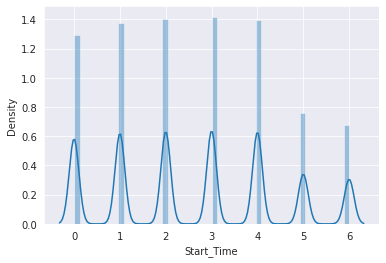

In [ ]:
sns.distplot(Start.dt.dayofweek)

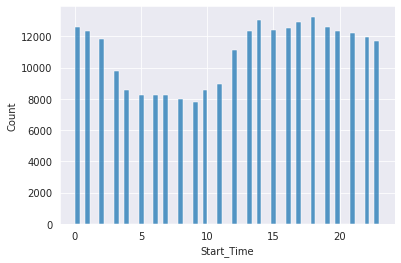

In [ ]:
sns.histplot(Start.dt.hour[Start.dt.dayofweek >= 5])

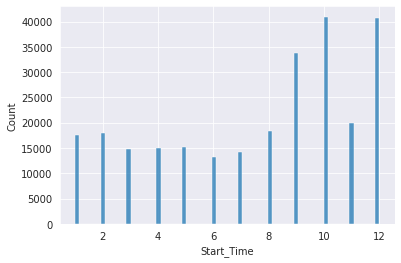

In [ ]:
sns.histplot(Start.dt.month[Start.dt.year == 2019])


In [ ]:
df.Weather_Condition.value_counts()[:10]

Fair                465252
Mostly Cloudy       193595
Clear               180223
Cloudy              161291
Partly Cloudy       133102
Overcast             87853
Light Rain           72511
Scattered Clouds     47061
Light Snow           22113
Fog                  19777
Name: Weather_Condition, dtype: int64

##Analysis W.R.T TIme of occurance - Start_time
* What time off the day are acciedents ?
* happening more frequently?
* Which Month has the highest frequency of accidents ?
* Which Year has th highest count of accidents?

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

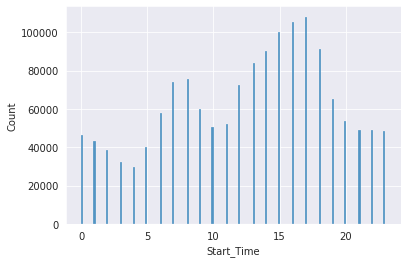

In [ ]:
Start= pd.to_datetime(df.Start_Time)

sns.histplot(Start.dt.hour)
Start.dt.hour

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


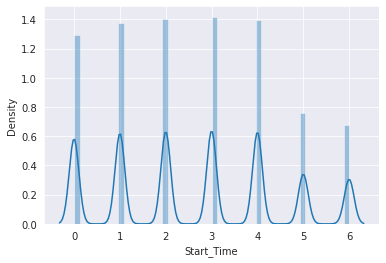

In [ ]:
sns.distplot(Start.dt.dayofweek)

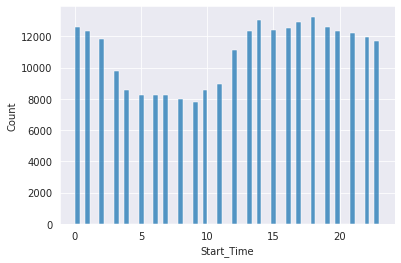

In [ ]:
sns.histplot(Start.dt.hour[Start.dt.dayofweek >= 5])

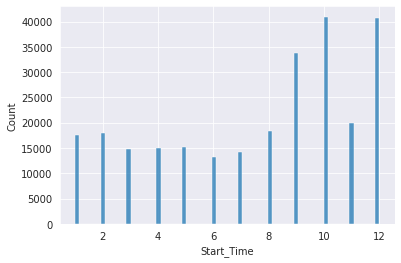

In [ ]:
sns.histplot(Start.dt.month[Start.dt.year == 2019])

In [ ]:
df.Weather_Condition.value_counts()[:10]

Fair                465252
Mostly Cloudy       193595
Clear               180223
Cloudy              161291
Partly Cloudy       133102
Overcast             87853
Light Rain           72511
Scattered Clouds     47061
Light Snow           22113
Fog                  19777
Name: Weather_Condition, dtype: int64

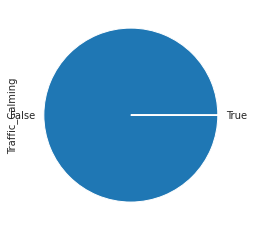

In [ ]:
df.Traffic_Calming.value_counts().plot.pie()

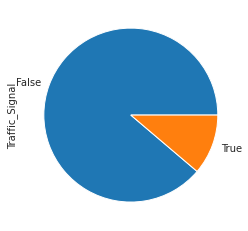

In [ ]:
df.Traffic_Signal.value_counts().plot.pie()

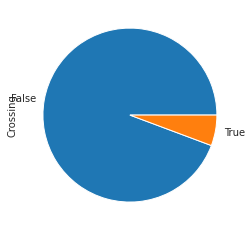

In [ ]:
df.Crossing.value_counts().plot.pie()

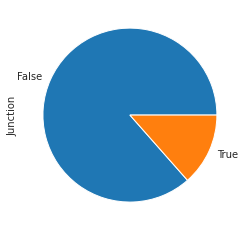

In [ ]:
df.Junction.value_counts().plot.pie()

## Summary And Conclusion
From the EDA of records from 2016 - 2020 for accidents occured in US we can infer that :

* The primary cause of accidents is high traffic.
* Lack of traffic control at accidents site has confirmed this observation.
* It is also obsereved that more accidents occur during the peak time where people are active either to and fro travelling for work or other purposes.
* Another factor backing up the above observation is that cities with better traffic control have less frequencies of accidents even those cities hold high population density.
* Climate and Weather conditions seems to be the secondary cause of accidents.
* We can postulate from the above data that during risky or intense climate conditions occurance of accidents are high but at the same time traffic is less which reduces the overall count.
* But with a partially clear climate traffic is not effected much. This in case increases the risk of accidents as well as the overall count.
* Having a colder and humid climate increses the chances of accidents caused due to slippery road surface.

Observation and analysis for US based accidents is to be progressed further w.r.t to State wise categorization as well as other factors.

These are the inferences gatherd from the data recieved from kaggle.com

##In this EDA project we learned to :


*   Use Google colab and notebook.
* Use jovian.ai.
* Connecting and downloading dataset.
* Working with pandas and dataframes.
* Plot graphs and charts with matplotlib.
* Create map using seaborn.
* Categorize and analyze column data.
* Work with numerical data.
* Average and mean data.
* EDA methods.
* Overall format of working and publishing data.



##Uploading and pushing Google collab to Kaggle 

In [ ]:
import jovian